In [1]:
import tensorflow as tf

from tf.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
import numpy as np
import cv2
import random

ModuleNotFoundError: No module named 'tensorflow'

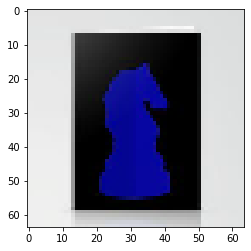

1

In [6]:

imagesandids = []
category_names = ['pawn','knight','queen','bishop','rook']


for categories in os.listdir('archive'):
    for file in os.listdir('archive/'+categories):
        img = cv2.imread('archive/'+categories+'/'+file, 1)
        img = cv2.resize(img,(64,64))
        onehot = []
        for name in range(len(category_names)):
            if category_names[name] == categories:
                onehot = name
        imagesandids.append((img,onehot))
random.shuffle(imagesandids)
traintestsplit = 0.8
train_set = imagesandids[int(len(imagesandids)*traintestsplit):]
test_set = imagesandids[:int(len(imagesandids)*traintestsplit)]
train_images = []
train_ids = []
test_images = []
test_ids = []

for image, ID in train_set:
    train_images.append(image)
    train_ids.append(ID)
for image, ID in test_set:
    test_images.append(image)
    test_ids.append(ID)
train_images = np.array(train_images)
train_ids = np.array(train_ids)
test_images = np.array(test_images)
test_ids = np.array(test_ids)
                       


# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
#print(train_images[0])
imgplot = plt.imshow(train_images[0])
plt.show()
train_ids[0]

In [8]:
model = models.Sequential()
activation = 'relu'
model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(64, 64)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=activation))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=activation))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_ids, epochs=20, 
                    validation_data=(test_images, test_ids))

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\svaud\.conda\envs\language\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\svaud\.conda\envs\language\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\svaud\.conda\envs\language\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\svaud\.conda\envs\language\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\svaud\.conda\envs\language\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\svaud\AppData\Local\Temp/ipykernel_8128/1349388092.py", line 5, in <module>
      history = model.fit(train_images, train_ids, epochs=20,
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\svaud\.conda\envs\language\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [2048,64] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_30232]

17/17 - 1s - loss: 2.8676 - accuracy: 0.4115 - 656ms/epoch - 39ms/step


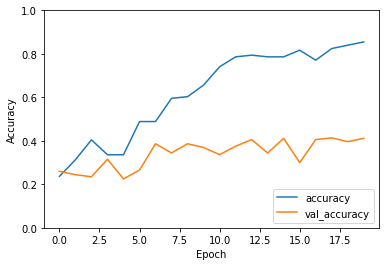

In [70]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_ids, verbose=2)